In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import nest_asyncio
import requests

In [17]:
def get_data(protocol_ids):
    list_data = []
    for protocol_id in protocol_ids:
        response = requests.get(f"http://localhost:8000/tvl/{protocol_id}").json()
        protocol_data = response["data"]
        for data in protocol_data:
            protocol_name, protocol_date, protocol_tvl = data['name'], data['date'], data['tvl']
            list_data.append({'name': protocol_name, 'date': protocol_date, 'tvl': protocol_tvl})
    df = pd.DataFrame(list_data)
    return df

19820031254.65925


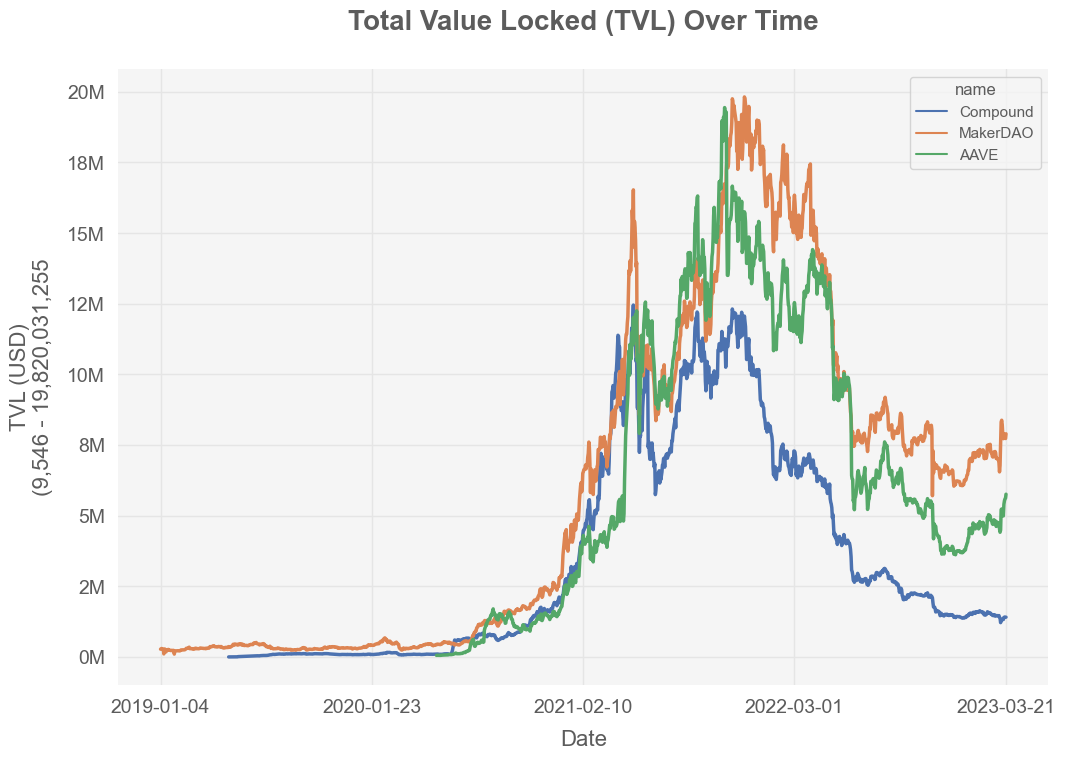

In [19]:
def billions_formatter(x, pos):
    return f'{x * 1e-9:.0f}M'

protocol_ids = [1, 2, 3]
df = get_data(protocol_ids)
df['date'] = pd.to_datetime(df['date'])

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8), 'axes.facecolor':'#f5f5f5', 'axes.edgecolor':'#5c5c5c', 
            'axes.labelcolor': '#5c5c5c', 'axes.grid':True, 'grid.color': '#e5e5e5', 
            'xtick.color': '#5c5c5c', 'ytick.color': '#5c5c5c', 'font.family': 'sans-serif', 
            'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif'], 
            'text.color': '#5c5c5c'})

sns.lineplot(x='date', y='tvl', hue='name', data=df, linewidth=2.5)

plt.title("Total Value Locked (TVL) Over Time", fontsize=20, fontweight='bold', y=1.05)
plt.xlabel("Date", fontsize=16, labelpad=10)
plt.ylabel("TVL (USD)", fontsize=16, labelpad=10)
plt.xticks(fontsize=14)

# Set x-axis tick labels
start_date = df['date'].min().strftime('%Y-%m-%d')
end_date = df['date'].max().strftime('%Y-%m-%d')
num_ticks = 5
tick_labels = pd.date_range(start_date, end_date, num_ticks).strftime('%Y-%m-%d')
plt.xticks(ticks=pd.date_range(start_date, end_date, num_ticks), labels=tick_labels)

# Remove scientific notation from y-axis labels and apply custom formatter
formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set y-axis label to value range
y_min = df['tvl'].min()
y_max = df['tvl'].max()

y_range = y_max - y_min
plt.ylabel(f"TVL (USD)\n({y_min:,.0f} - {y_max:,.0f}", fontsize=16, labelpad=10)

plt.yticks(fontsize=14)

sns.despine(left=True, bottom=True)
plt.savefig("tvl_over_time.png", dpi=300, bbox_inches='tight')

plt.show()
